In [1]:
# Column Name	Description
# 📅 Date	Trading date (YYYY-MM-DD)
# ⬆ Open	Opening stock price of the day
# 🔼 High	Highest stock price of the day
# 🔽 Low	Lowest stock price of the day
# 📉 Close	Closing stock price of the day
# 🔄 Adj Close	Adjusted closing price after stock splits & dividends
# 📦 Volume	Number of shares traded

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df= pd.read_csv('NVDA.csv')

In [6]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.corr()

,Date,Adj Close,Close,High,Low,Open,Volume
Date,1.000000,0.535782,0.535950,0.535777,0.536024,0.535595,-0.285190
Adj Close,0.535782,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164438
Close,0.535950,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164415
High,0.535777,0.999799,0.999799,1.000000,0.999803,0.999881,-0.163423
Low,0.536024,0.999861,0.999861,0.999803,1.000000,0.999797,-0.165182
Open,0.535595,0.999613,0.999613,0.999881,0.999797,1.000000,-0.164090
Volume,-0.285190,-0.164438,-0.164415,-0.163423,-0.165182,-0.164090,1.000000


In [10]:
df.dtypes

Date         datetime64[ns]
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

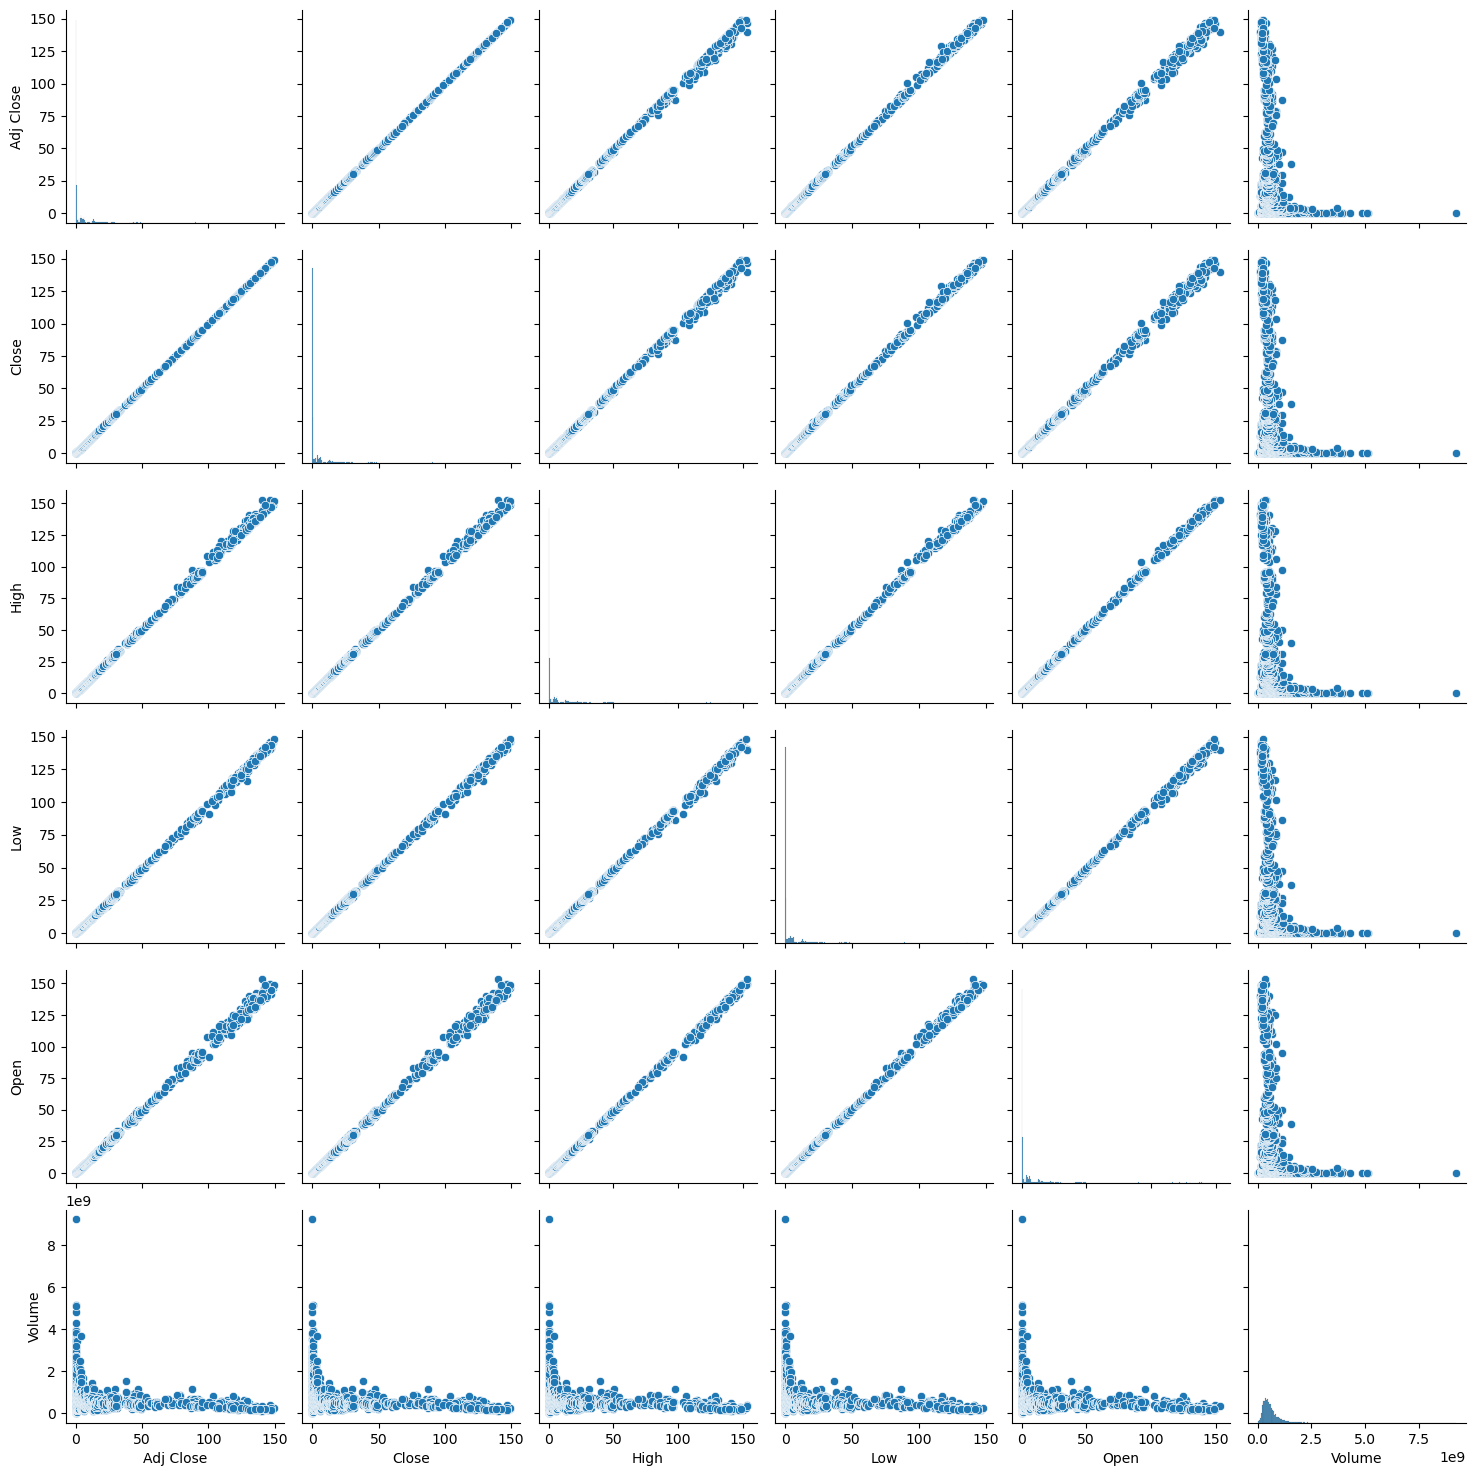

In [11]:
sns.pairplot(df)

In [12]:
# Compute Correlation Matrix
corr_matrix = df.drop(columns=["Date"]).corr()  # Drop non-numeric columns

# Check if corr_matrix is created properly
print(corr_matrix)

           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  1.000000  0.999799  0.999861  0.999613 -0.164438
Close       1.000000  1.000000  0.999799  0.999861  0.999613 -0.164415
High        0.999799  0.999799  1.000000  0.999803  0.999881 -0.163423
Low         0.999861  0.999861  0.999803  1.000000  0.999797 -0.165182
Open        0.999613  0.999613  0.999881  0.999797  1.000000 -0.164090
Volume     -0.164438 -0.164415 -0.163423 -0.165182 -0.164090  1.000000


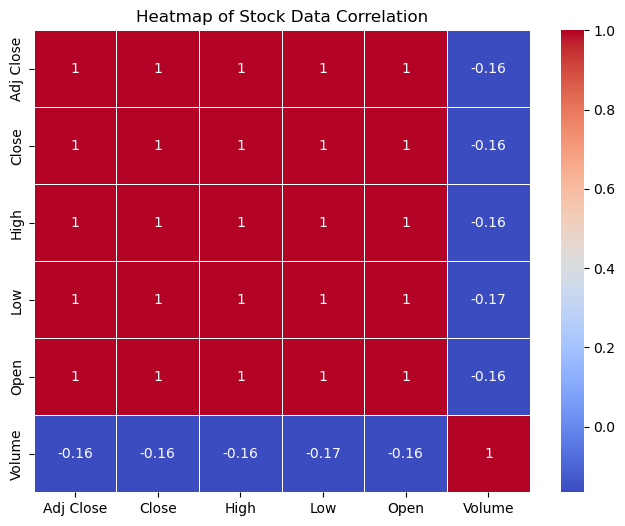

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Stock Data Correlation")
plt.show()

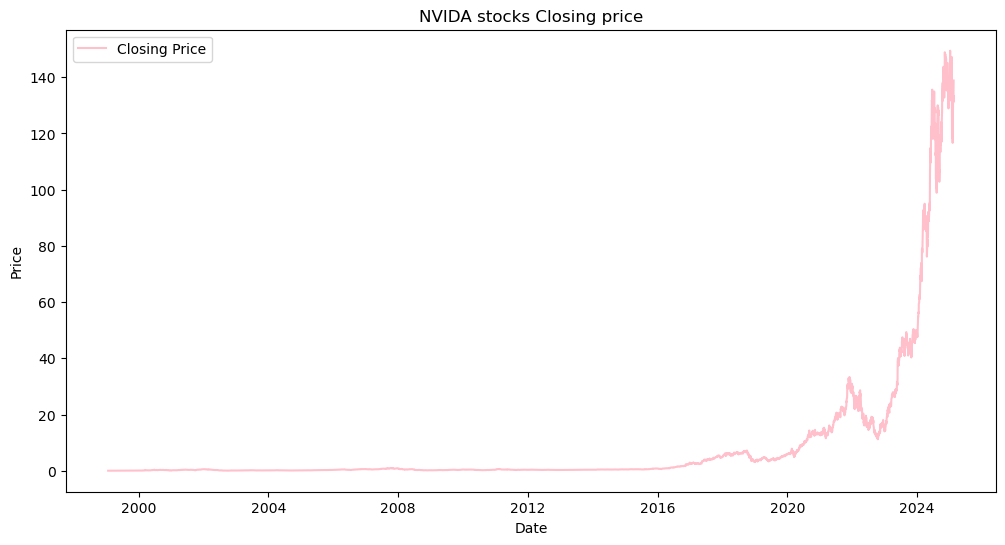

In [14]:
plt.figure(figsize =(12,6))
plt.plot(df['Date'],df['Close'], label= 'Closing Price', color='pink')
plt.title("NVIDA stocks Closing price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
X= df[["Open", 'High', "Adj Close", "Low"]]
y= df['Close']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

scaler= StandardScaler()

In [17]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [48]:
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred= model.predict(X_test_scaled)

In [19]:
# Calculate Errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")


Mean Absolute Error (MAE): 0.6107
Mean Squared Error (MSE): 2.5470
Root Mean Squared Error (RMSE): 1.5959
R-squared Score (R2): 0.9951


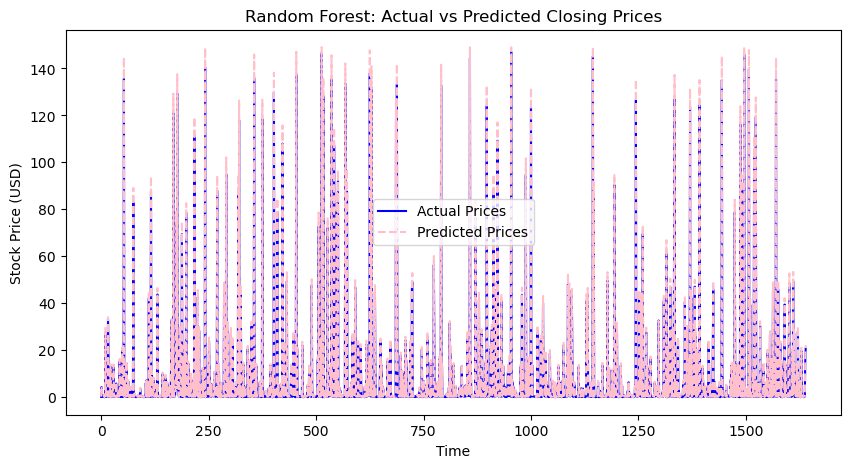

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="pink", linestyle="dashed")
plt.title("Random Forest: Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


In [44]:
from sklearn.tree import plot_tree

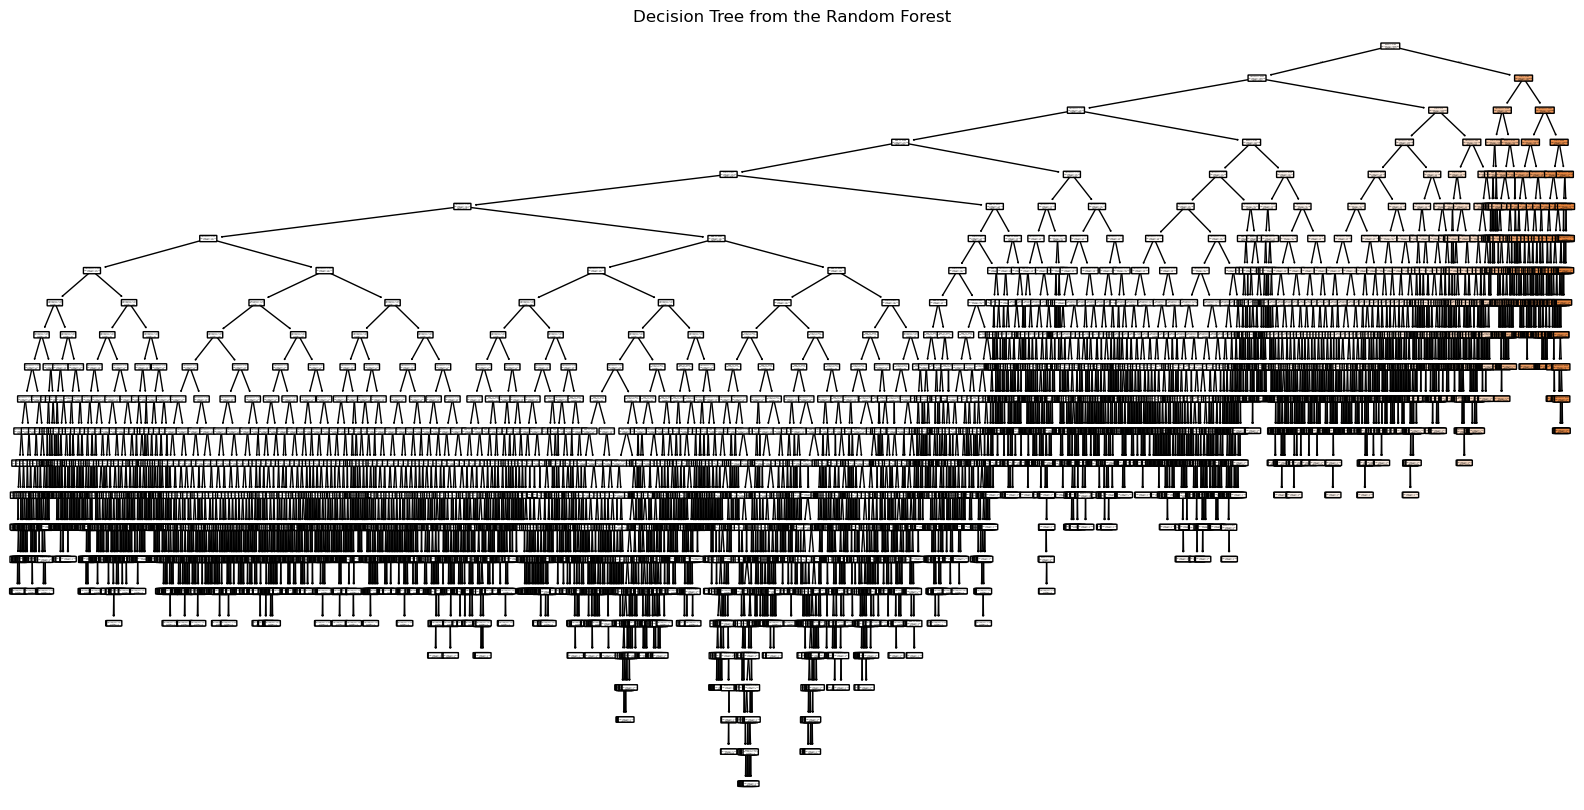

In [52]:
if hasattr(model, "estimators_") and len(model.estimators_) > 0:
    tree = model.estimators_[0]
    plt.figure(figsize=(20, 10))
    plot_tree(tree, 
              feature_names=["Open", "High", "Adj Close", "Low"],  # Feature names from dataset
              filled=True,  
              rounded=True)  

    plt.title("Decision Tree from the Random Forest")
    plt.show()
else:
    print("Error: The model is not trained yet or has no estimators!")
